# 使用环境噪音产生真随机数

## 加载模块 使用pyaudio获取声卡信号，使用wave解码

In [1]:
import pyaudio
import wave
import matplotlib.pyplot as plt
import numpy as np

## 录音函数

In [2]:
def record(time=0.1):
    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 102400
    RECORD_SECONDS = time

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)

    data_b = b''.join(frames)
    
    stream.stop_stream()
    stream.close()
    p.terminate()
    return(data_b,time)

## 画图函数

In [3]:
def draw(data_b,time,RATE=102400):
    RECORD_SECONDS = time
    wave_data = np.fromstring(data_b, dtype=np.int16)
    wave_data = wave_data.T
    time = np.arange(0, RATE * RECORD_SECONDS) * (1.0 / RATE)

    fig = plt.figure()
    plt.plot(time, wave_data)
    plt.show()

## 随机数提取函数

In [4]:
def norm_number(data_b,time,MIN,MAX,NUM):
    wave_data = np.fromstring(data_b, dtype=np.int16)
    Ratio = (MAX-MIN)/(max(wave_data)-min(wave_data))
    LEN = len(wave_data)
    STEP = int(LEN/NUM)
    number = []
    for i in range(0,LEN,STEP):
        number.append(wave_data[i]*Ratio)
    return number

## 总体数据数值分布（1000次，夜，室内，环境白噪音，录音0.1s）

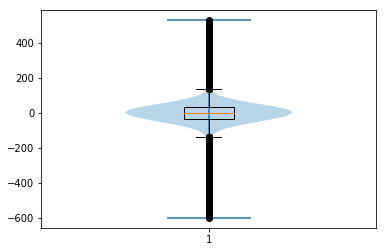

In [5]:
num = []

for i in range(1000):
    wave_data = np.fromstring(record()[0], dtype=np.int16)
    num.extend(wave_data)    
fig = plt.figure()
plt.violinplot(num)
plt.boxplot(num)
plt.show()

## 生成正态随机数（未检验正态性，夜，室内，环境白噪音，录音0.1s）

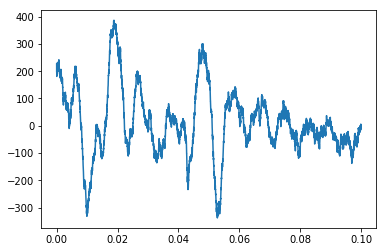

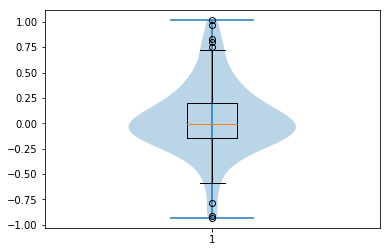

In [13]:
data_b, time = record()[0],record()[1]

draw(data_b,time)

num = norm_number(data_b,time,-1,1,100)

fig = plt.figure()
plt.violinplot(num)
plt.boxplot(num)
plt.show()

## 注意，特殊情况下可能产生均匀随机数（摩擦震动产生正弦波。）

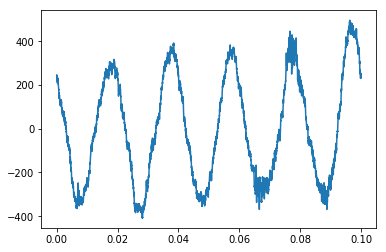

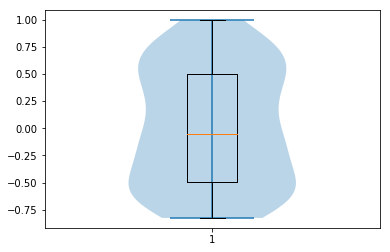

In [75]:
data_b, time = record()[0],record()[1]

draw(data_b,time)

num = norm_number(data_b,time,-1,1,100)

fig = plt.figure()
plt.violinplot(num)
plt.boxplot(num)
plt.show()

## numpy伪随机数对照（正态）

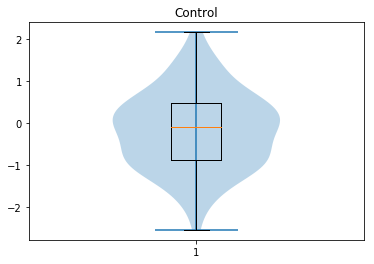

In [14]:
num_control = np.random.randn(100)
fig, ax = plt.subplots()
plt.violinplot(num_control)
plt.boxplot(num_control)
plt.boxplot(num_control)
ax.set_title('Control')
plt.show()

## numpy伪随机数对照（均匀）

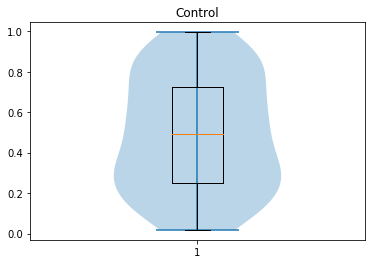

In [15]:
num_control = np.random.rand(100)
fig, ax = plt.subplots()
plt.violinplot(num_control)
plt.boxplot(num_control)
plt.boxplot(num_control)
ax.set_title('Control')
plt.show()